In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!mv kaggle.json ~/.kaggle/

mv: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d kazanova/sentiment140

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
 78% 63.0M/80.9M [00:00<00:00, 192MB/s]
100% 80.9M/80.9M [00:00<00:00, 202MB/s]


In [ ]:
from zipfile import ZipFile
dataset = '/content/sentiment140.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('Dataset is extracted')

Dataset is extracted


In [ ]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# downloading the stopwords
import nltk
nltk.download('stopwords')

# printing the stopwords in english
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import pandas as pd
df = pd.read_csv('/content/training.1600000.processed.noemoticon.csv' , encoding = 'ISO-8859-1')

In [ ]:
import pandas as pd

# Define column names
column_names = ['target', 'id', 'date', 'flag', 'user', 'text']

# Load the data
df = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', encoding='ISO-8859-1', names=column_names)

# Drop the 'date' column
df = df.drop('date', axis=1)

# Display 10 random samples to verify
df.sample(10)


,target,id,flag,user,text
931474,4,1770837641,NO_QUERY,GabyRomeroA,@meristemstudio I am so jealous! and I am soo...
1066953,4,1965409098,NO_QUERY,AmandaColle,Jeff-fa-fa Dunham... Tonight!
1445598,4,2062409732,NO_QUERY,PrincessSammeh,@itshannahb OMG! so do i
1355717,4,2047545336,NO_QUERY,Tommrob,more followers please
105635,0,1823143238,NO_QUERY,happymeals,Was I the only one not there?
182219,0,1967086860,NO_QUERY,roxrios,Has a stomach Virus! Been sick for a couple d...
1278163,4,2001396546,NO_QUERY,chazsic,hello people.... i'm newbie here on twitter
131996,0,1835653219,NO_QUERY,agrajagthetesty,The leather miniskirt I ordered for revamped!c...
207589,0,1973517328,NO_QUERY,beingnobody,@namakemono49 I want a Dec hug!
1062273,4,1964096890,NO_QUERY,MaggieHackett,Looking forward to Addicted to Bad Ideas tonig...


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   flag    1600000 non-null  object
 3   user    1600000 non-null  object
 4   text    1600000 non-null  object
dtypes: int64(2), object(3)
memory usage: 61.0+ MB
None


In [ ]:
df.isnull().sum()

,0
target,0
id,0
flag,0
user,0
text,0


In [ ]:
print(df.describe(include='all'))

              target            id      flag      user  \
count   1.600000e+06  1.600000e+06   1600000   1600000   
unique           NaN           NaN         1    659775   
top              NaN           NaN  NO_QUERY  lost_dog   
freq             NaN           NaN   1600000       549   
mean    2.000000e+00  1.998818e+09       NaN       NaN   
std     2.000001e+00  1.935761e+08       NaN       NaN   
min     0.000000e+00  1.467810e+09       NaN       NaN   
25%     0.000000e+00  1.956916e+09       NaN       NaN   
50%     2.000000e+00  2.002102e+09       NaN       NaN   
75%     4.000000e+00  2.177059e+09       NaN       NaN   
max     4.000000e+00  2.329206e+09       NaN       NaN   

                             text  
count                     1600000  
unique                    1581466  
top     isPlayer Has Died! Sorry   
freq                          210  
mean                          NaN  
std                           NaN  
min                           NaN  
25%            

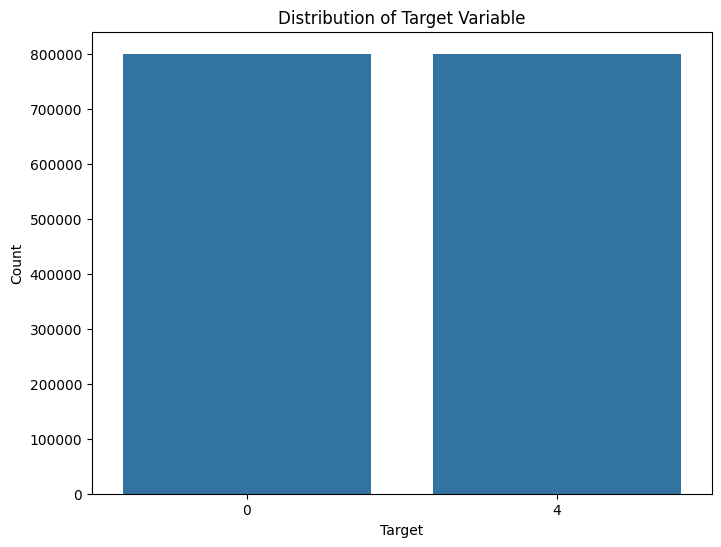

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [ ]:
# df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Plotting the number of tweets over time
plt.figure(figsize=(12, 6))
df.set_index('date').resample('M').size().plot()
plt.title('Number of Tweets Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()

KeyError: "None of ['date'] are in the columns"

<Figure size 1200x600 with 0 Axes>

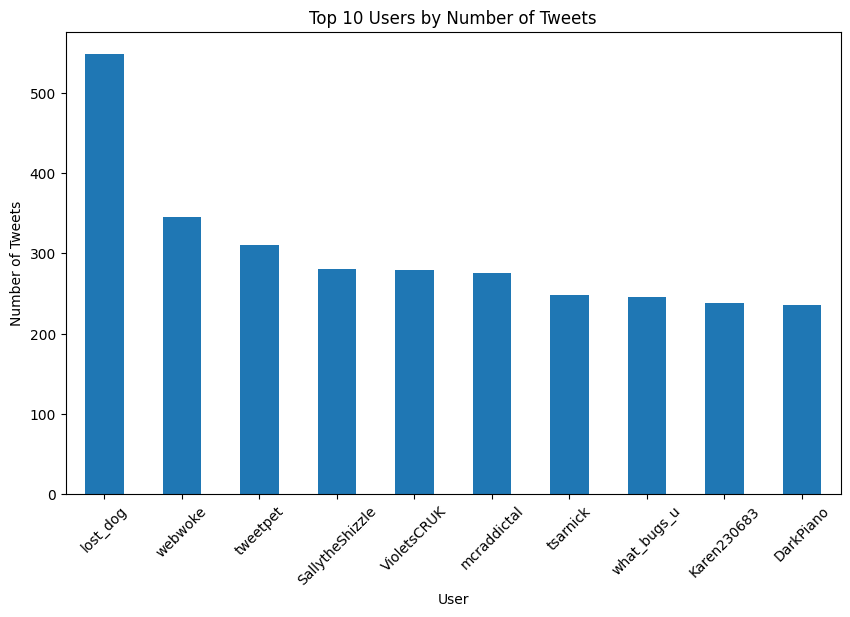

In [ ]:
top_users = df['user'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_users.plot(kind='bar')
plt.title('Top 10 Users by Number of Tweets')
plt.xlabel('User')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


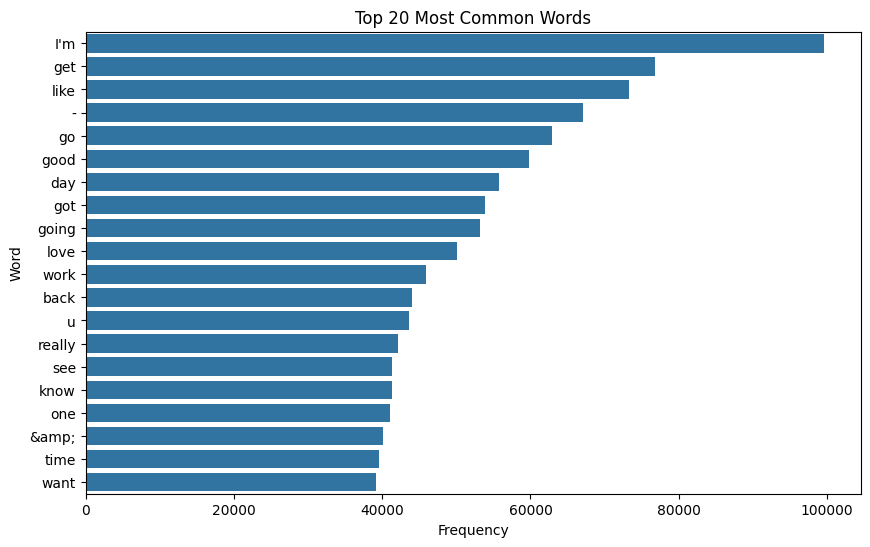

In [ ]:
from collections import Counter
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Tokenize the text and remove stopwords
words = [word for text in df['text'].dropna() for word in text.split() if word.lower() not in stop_words]
word_freq = Counter(words)

# Top 20 most common words
common_words = word_freq.most_common(20)

# Convert to DataFrame for plotting
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=common_words_df)
plt.title('Top 20 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

In [ ]:
# Tweets by target over time

plt.figure(figsize=(12, 6))
df.set_index('date').groupby('target').resample('M').size().unstack().plot()[]
plt.title('Number of Tweets by Target Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()

KeyError: "None of ['date'] are in the columns"

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

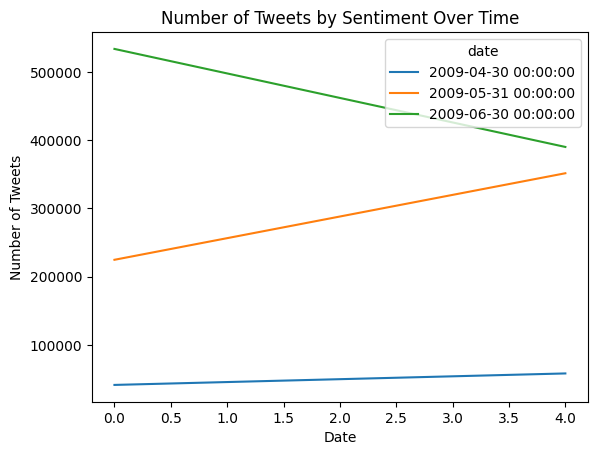

In [ ]:
# Sentiment distribution over time
plt.figure(figsize=(12, 6))
df.set_index('date').groupby('target').resample('M').size().unstack().plot()
plt.title('Number of Tweets by Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()

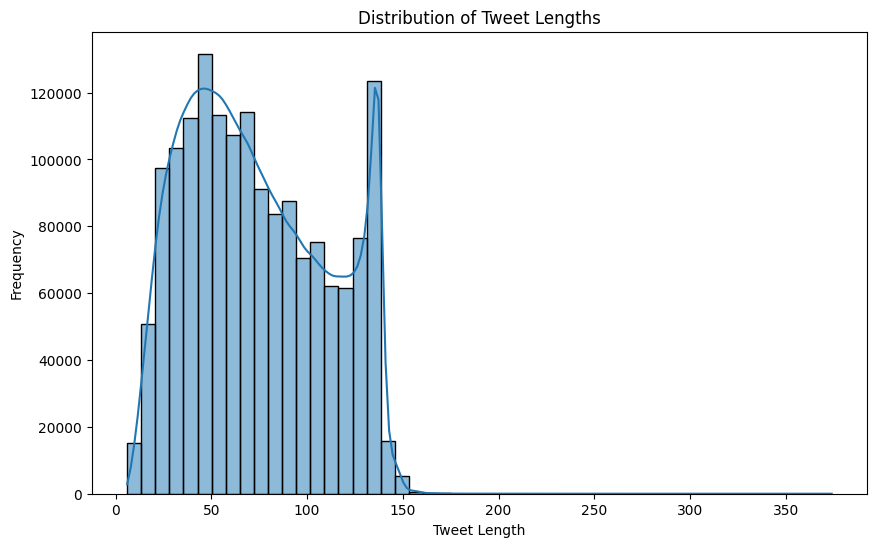

In [ ]:
# Calculate the length of each tweet
df['text_length'] = df['text'].apply(len)

# Distribution of tweet lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

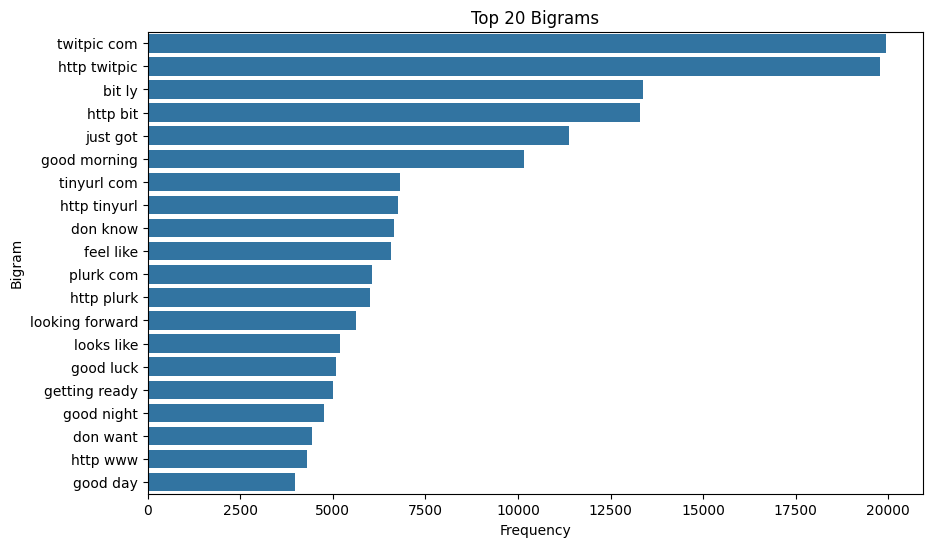

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_grams(corpus, n=None, ngram_range=(2, 2)):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Top 20 bigrams
bigrams = get_top_n_grams(df['text'], n=20, ngram_range=(2, 2))
bigram_df = pd.DataFrame(bigrams, columns=['Bigram', 'Frequency'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Bigram', data=bigram_df)
plt.title('Top 20 Bigrams')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.show()

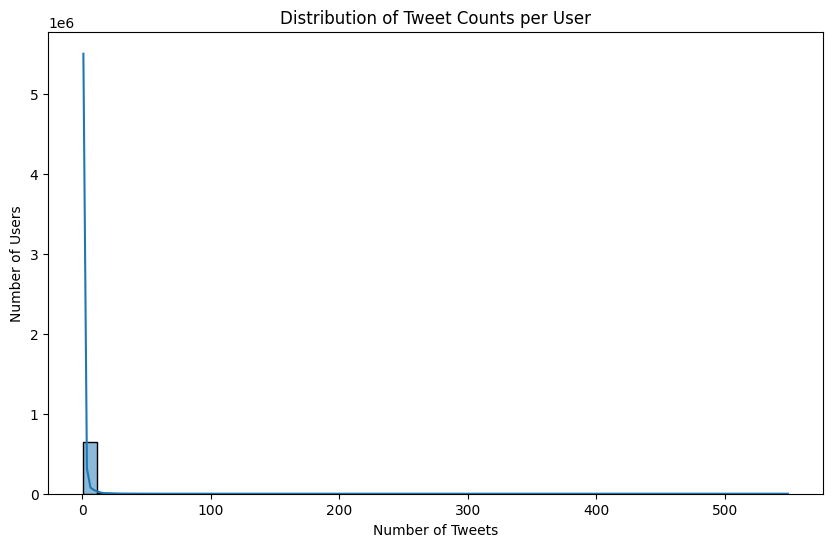

In [ ]:
  # Distribution of tweet counts per user
user_tweet_counts = df['user'].value_counts()

  plt.figure(figsize=(10, 6))
  sns.histplot(user_tweet_counts, bins=50, kde=True)
  plt.title('Distribution of Tweet Counts per User')
  plt.xlabel('Number of Tweets')
  plt.ylabel('Number of Users')
  plt.show()

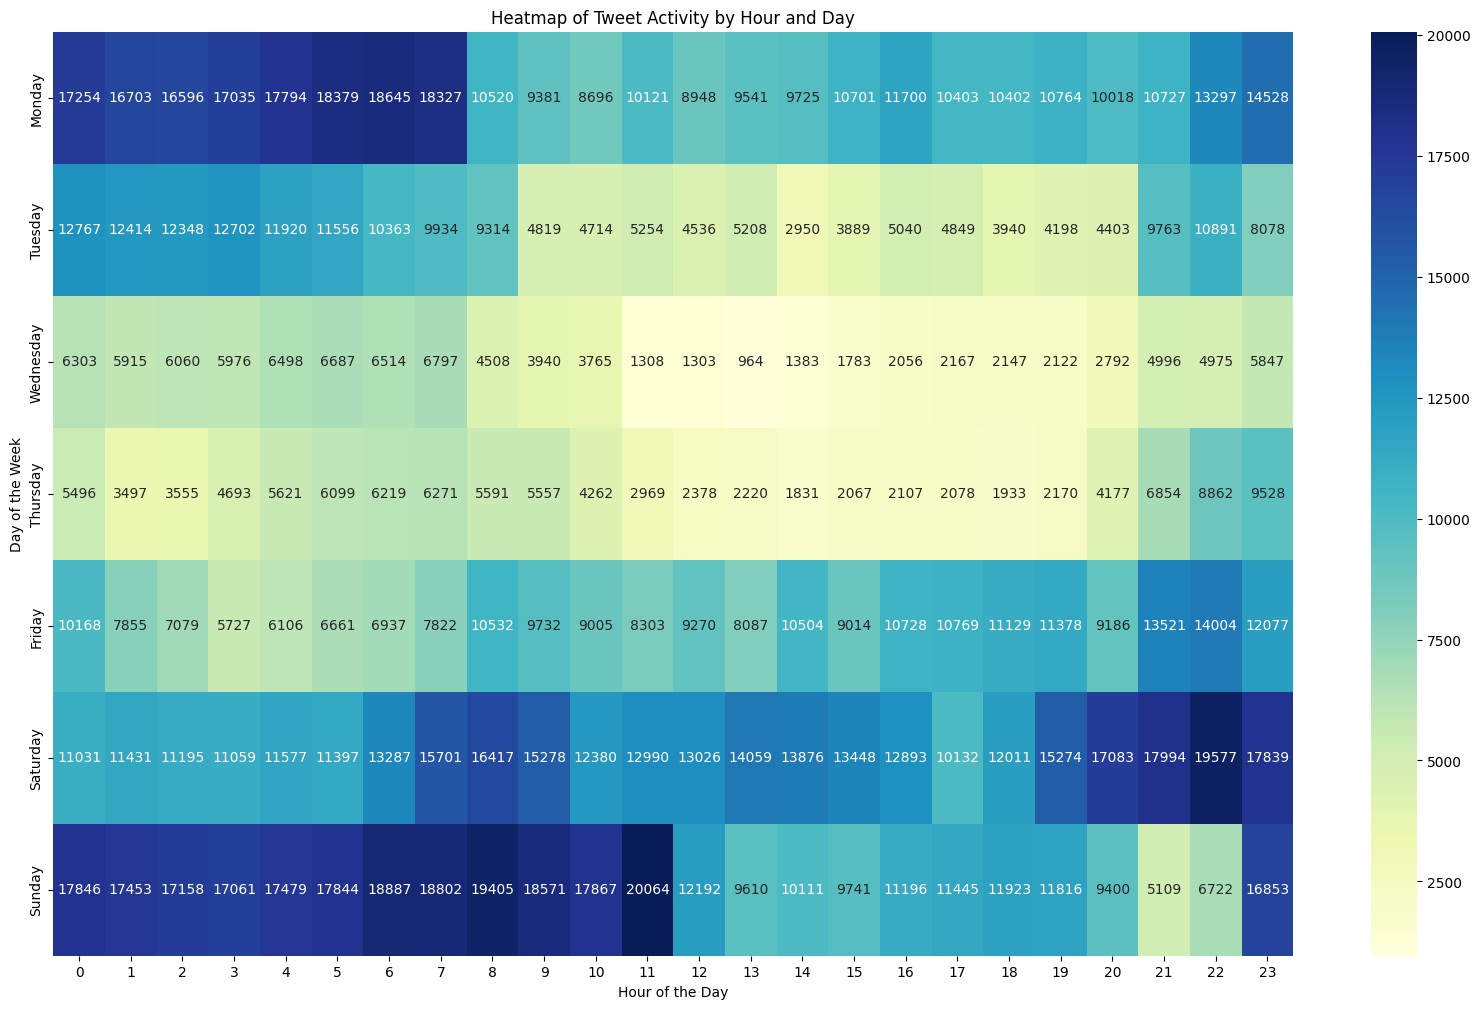

In [ ]:
# Extract hour and day of the week from the date
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.day_name()

# Pivot table for heatmap
pivot_table = df.pivot_table(index='day_of_week', columns='hour', values='text', aggfunc='count').fillna(0)

# Reorder the days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(days_order)

plt.figure(figsize=(20, 12))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Heatmap of Tweet Activity by Hour and Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()

<ipython-input-27-1729e2680f96>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=df, palette='viridis')


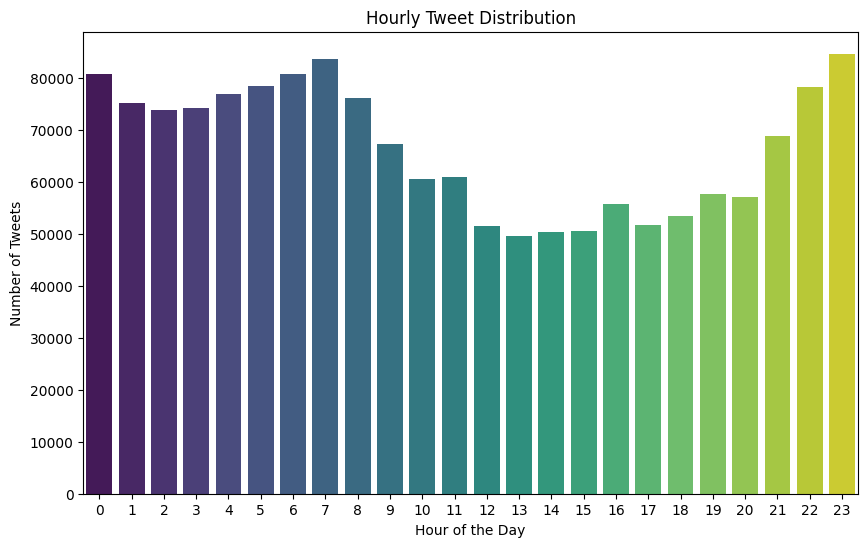

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='hour', data=df, palette='viridis')
plt.title('Hourly Tweet Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Tweets')
plt.show()

<ipython-input-28-6049478bd8c5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day_of_week', data=df, order=days_order, palette='viridis')


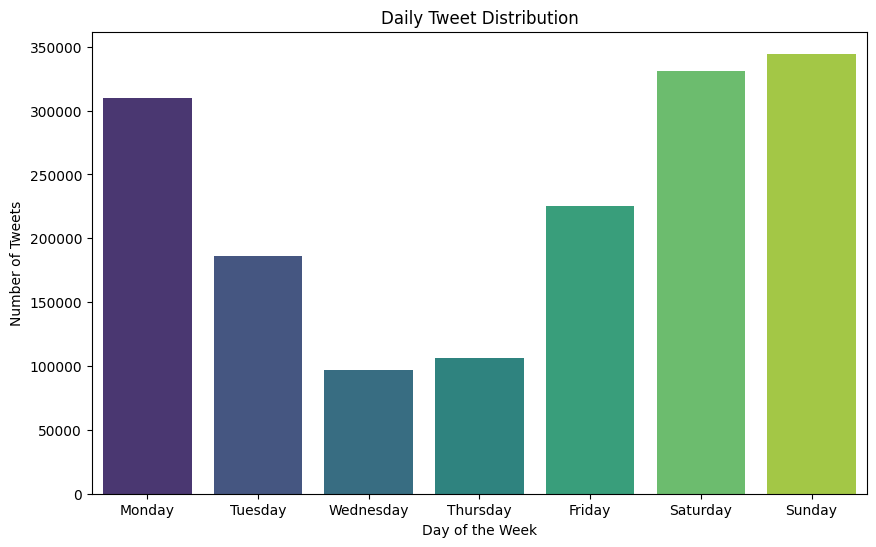

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=df, order=days_order, palette='viridis')
plt.title('Daily Tweet Distribution')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Tweets')
plt.show()

<ipython-input-29-a70a8fe886c6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_labels, y=sentiment_counts, palette='viridis')


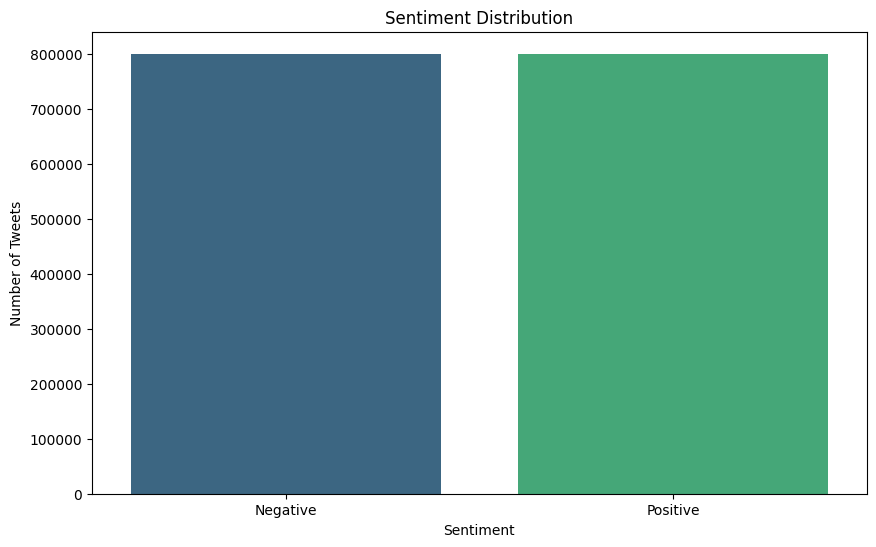

In [ ]:
sentiment_counts = df['target'].value_counts().sort_index()
sentiment_labels = ['Negative', 'Positive']

plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_labels, y=sentiment_counts, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

<ipython-input-30-cc700ee1ad79>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users.values, y=top_users.index, palette='viridis')


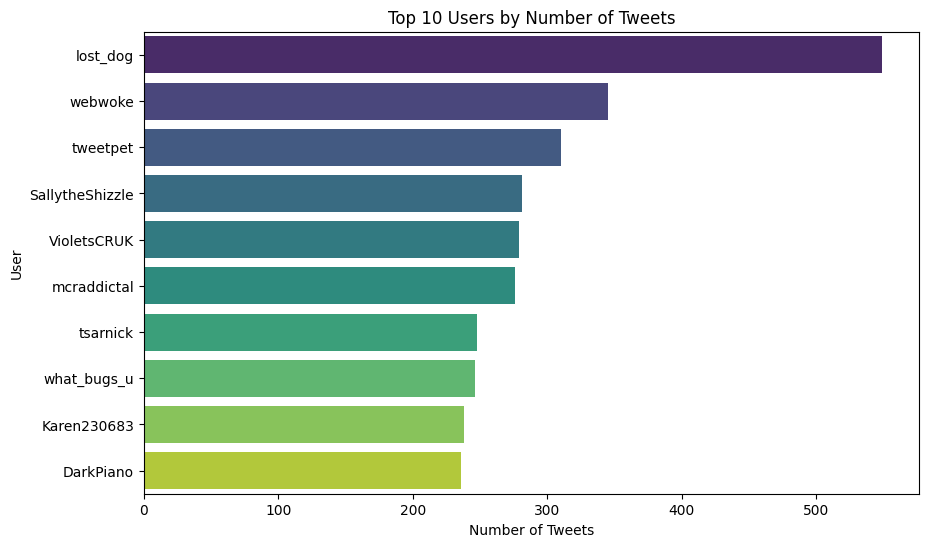

In [ ]:
top_users = df['user'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_users.values, y=top_users.index, palette='viridis')
plt.title('Top 10 Users by Number of Tweets')
plt.xlabel('Number of Tweets')
plt.ylabel('User')
plt.show()


<ipython-input-31-b2b75c975d96>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users.values, y=top_users.index, palette='viridis')


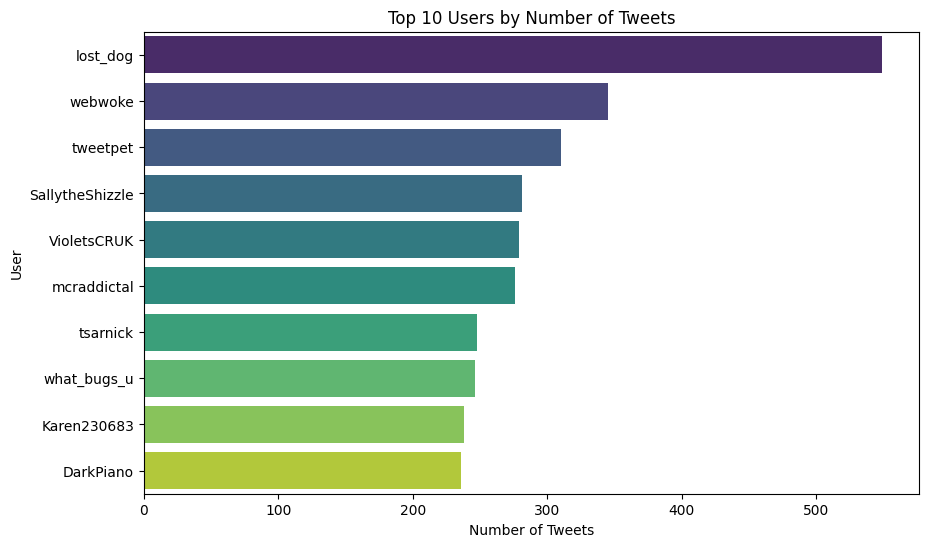

In [ ]:
# Top Users
top_users = df['user'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_users.values, y=top_users.index, palette='viridis')
plt.title('Top 10 Users by Number of Tweets')
plt.xlabel('Number of Tweets')
plt.ylabel('User')
plt.show()

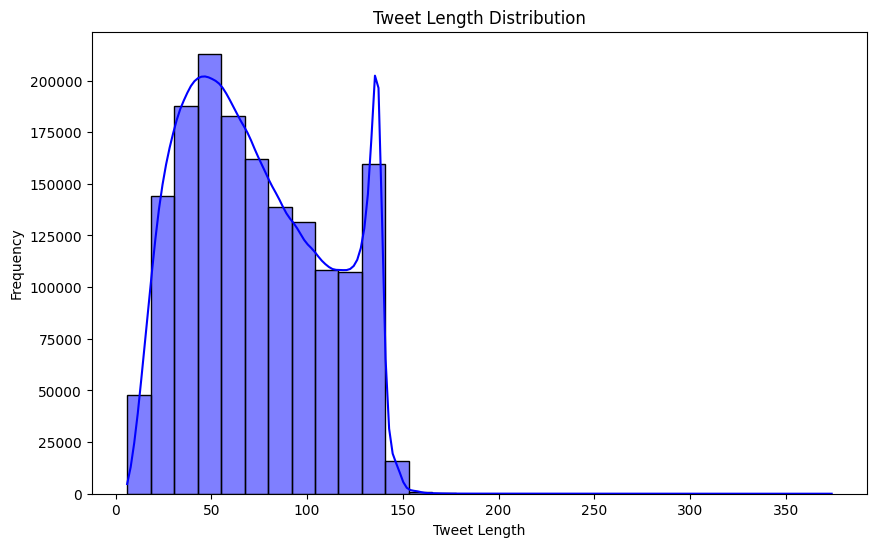

In [ ]:
df['tweet_length'] = df['text'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['tweet_length'], bins=30, kde=True, color='blue')
plt.title('Tweet Length Distribution')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

<ipython-input-34-8036df447d0c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day_of_week', y='hour', data=df, order=days_order, palette='viridis')


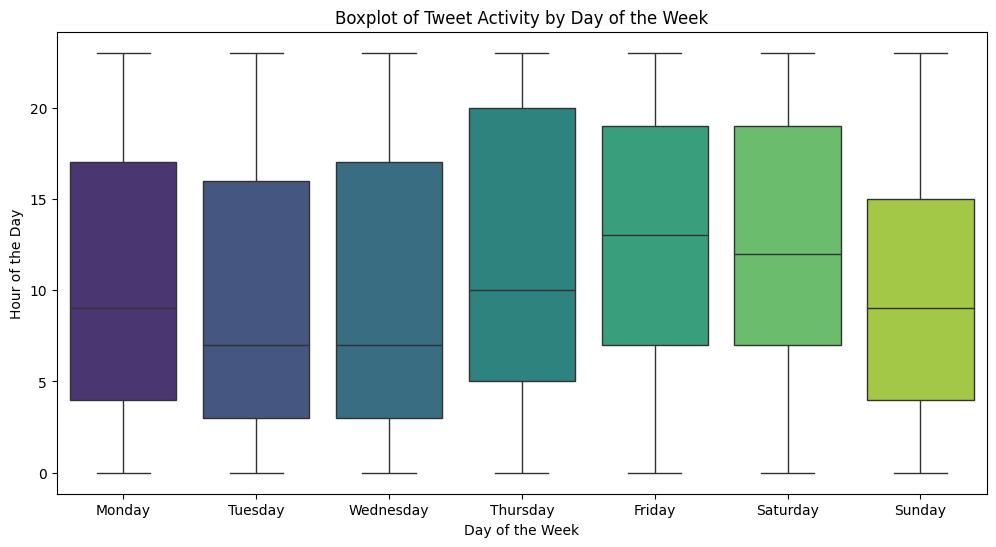

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_week', y='hour', data=df, order=days_order, palette='viridis')
plt.title('Boxplot of Tweet Activity by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.show()

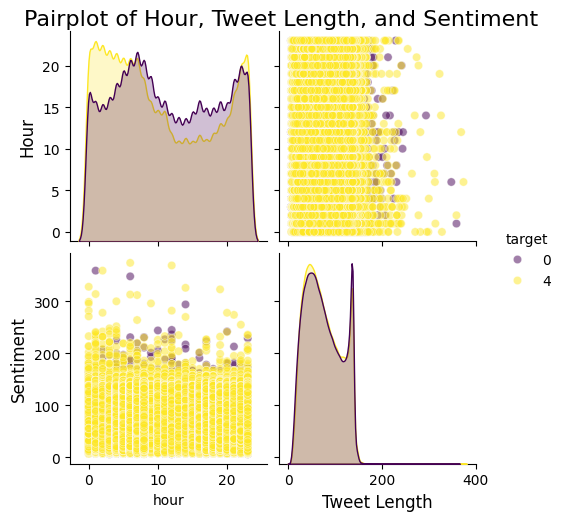

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating the pair plot with more details
pair_plot = sns.pairplot(df[['hour', 'tweet_length', 'target']], hue='target', palette='viridis', diag_kind='kde', plot_kws={'alpha': 0.5})

# Set labels for each subplot
labels = ['Hour', 'Tweet Length', 'Sentiment']
for i, ax in enumerate(pair_plot.axes.flatten()):
    if i % len(labels) == 0:
        ax.set_xlabel(labels[i // len(labels)], fontsize=12)
    ax.set_ylabel(labels[i % len(labels)], fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=10)

plt.suptitle('Pairplot of Hour, Tweet Length, and Sentiment', y=1.02, fontsize=16)
plt.show()


In [ ]:
df['target'].value_counts()

,count
target,
0,800000
4,800000


In [ ]:
df.replace({'target':{4:1}} , inplace=True)
df

,target,id,flag,user,text
0,0,1467810369,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...
1599995,1,2193601966,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,1,2193601969,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,2193601991,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,2193602064,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic statistics
print(df.describe())

          target            id
count  1600000.0  1.600000e+06
mean         0.5  1.998818e+09
std          0.5  1.935761e+08
min          0.0  1.467810e+09
25%          0.0  1.956916e+09
50%          0.5  2.002102e+09
75%          1.0  2.177059e+09
max          1.0  2.329206e+09


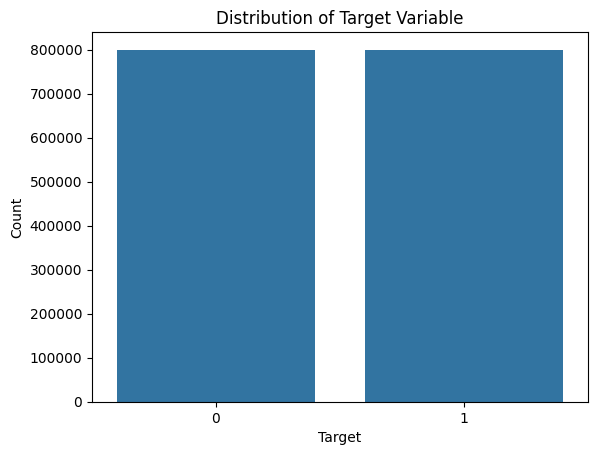

In [ ]:
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

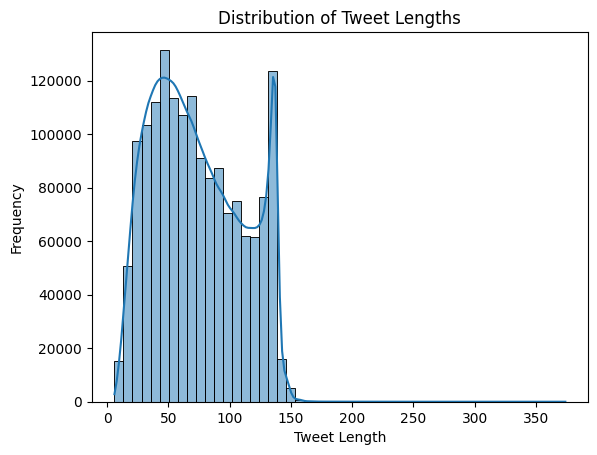

In [ ]:
df['text_length'] = df['text'].apply(len)
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

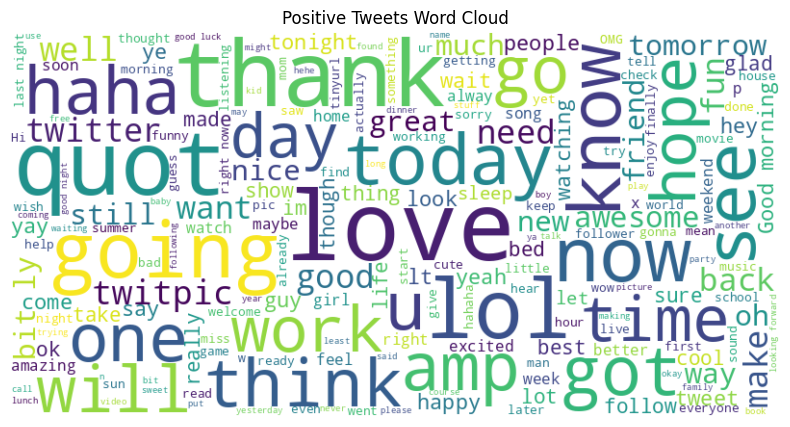

In [ ]:
from wordcloud import WordCloud

# Positive tweets word cloud
positive_text = ' '.join(df[df['target'] == 1]['text'])
wordcloud = WordCloud(width=800, height=400, max_font_size=100, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Positive Tweets Word Cloud')
plt.axis('off')
plt.show()

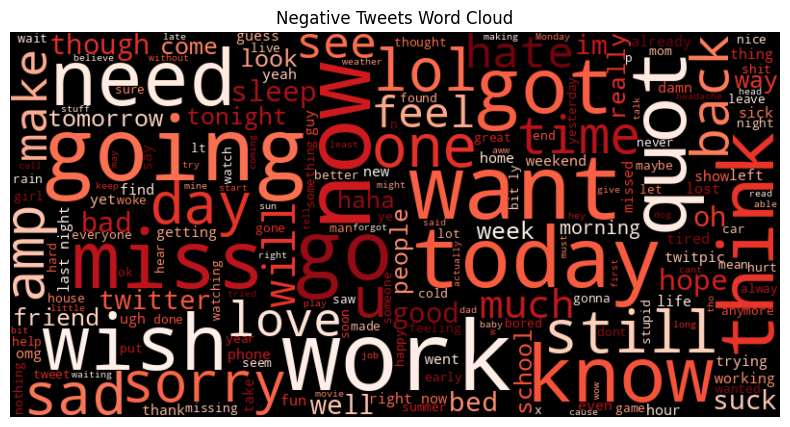

In [ ]:
# Negative tweets word cloud
negative_text = ' '.join(df[df['target'] == 0]['text'])
wordcloud = WordCloud(width=800, height=400, max_font_size=100, background_color='black', colormap='Reds').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Negative Tweets Word Cloud')
plt.axis('off')
plt.show()

In [ ]:
import pandas as pd

# Define column names
column_names = ['target', 'id', 'date', 'flag', 'user', 'text']

# Read the CSV file
df = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', encoding='ISO-8859-1', names=column_names)

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%a %b %d %H:%M:%S PDT %Y', errors='coerce')

# Drop rows with invalid dates
df.dropna(subset=['date'], inplace=True)

# Sort DataFrame by date
df.sort_values(by='date', inplace=True)

# Get the oldest tweet
oldest_tweet = df.iloc[0]

# Get the latest tweet
latest_tweet = df.iloc[-1]

print("Oldest Tweet:")
print(oldest_tweet)

print("\nLatest Tweet:")
print(latest_tweet)


Oldest Tweet:
target                                                    0
id                                               1467810369
date                                    2009-04-06 22:19:45
flag                                               NO_QUERY
user                                        _TheSpecialOne_
text      @switchfoot http://twitpic.com/2y1zl - Awww, t...
Name: 0, dtype: object

Latest Tweet:
target                                                    0
id                                               2329205794
date                                    2009-06-25 10:28:31
flag                                               NO_QUERY
user                                             tpchandler
text      has to resit exams over summer...  wishes he w...
Name: 799999, dtype: object


In [ ]:
df.replace({'target':{4:1}} , inplace=True)

data=df[['text','target']]
# Separating positive and negative tweets
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]
dataset = pd.concat([data_pos, data_neg])
dataset

,text,target
800000,I LOVE @Health4UandPets u guys r the best!!,1
800001,im meeting up with one of my besties tonight! ...,1
800002,"@DaRealSunisaKim Thanks for the Twitter add, S...",1
800003,Being sick can be really cheap when it hurts t...,1
800004,@LovesBrooklyn2 he has that effect on everyone,1
...,...,...
799995,Sick Spending my day laying in bed listening ...,0
799996,Gmail is down?,0
799997,rest in peace Farrah! So sad,0
799998,@Eric_Urbane Sounds like a rival is flagging y...,0


In [ ]:
# It will take 20-30 min depends on system or internet speed
port_stem = PorterStemmer()
def stem(text):
  stem_content = re.sub('[^a-zA-Z]', ' ', text) # if words is a special character or number it will be removed
  stem_content = stem_content.lower() # word will be converted to lower case
  stem_content = stem_content.split() # word will be split
  stem_content = [port_stem.stem(word) for word in stem_content if not word in stopwords.words('english')] # this will remove all stemming words
  stem_content = ' '.join(stem_content)
  return stem_content
dataset['stemmed_content'] = dataset['text'].apply(stem) # takes a lot of time
dataset.sample(10)

,text,target,stemmed_content
14188,@reallytruly zeitgeist is far away,0,reallytruli zeitgeist far away
1035699,"At Revoluion, about to watch Ms. Bebe Zahara B...",1,revoluion watch ms bebe zahara benet perform
765745,Fucking pouring,0,fuck pour
1368350,"I'm outta here....nighty night, all! Don't let...",1,outta nighti night let bedbug bite
1075088,@hotforwords That's why you're supposed to hav...,1,hotforword suppos driver
111667,marley and me is so sad,0,marley sad
766511,Makes my tummy hurt thinking about it,0,make tummi hurt think
1224745,"@toncijukic Gle, netko &quot;noviji&quot; od m...",1,toncijuk gle netko quot noviji quot od mene
142496,A lovely day in Reading. Or so I am told. I ha...,0,love day read told window offic hate job love ...
602711,why arnt they calling yet??,0,arnt call yet


In [ ]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

dataset.to_csv('output.csv', encoding='utf-8')
dataset.tail()
#Separating the data and label
x = dataset['stemmed_content'].values
y = dataset['target'].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y ,random_state=2)

In [ ]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
SVCmodel = LinearSVC(random_state=40)
SVCmodel.fit(X_train, y_train)
# accuracy score on the testing data
y_pred = SVCmodel.predict(X_test)
X_test_pred = SVCmodel.predict(X_test)
test_acc = accuracy_score(y_test, X_test_pred)
# accuracy score on the training data
X_train_pred = SVCmodel.predict(X_train)
train_acc = (y_train, X_train_pred)

print("Accuracy of training Data - ", train_acc , "\nAccuracy of test data - ", test_acc)


Accuracy of training Data -  (array([1, 1, 0, ..., 1, 1, 0]), array([1, 1, 1, ..., 1, 1, 0])) 
Accuracy of test data -  0.795675


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Vectorization
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Model training
SVCmodel = LinearSVC(random_state=40)
SVCmodel.fit(X_train_vectorized, y_train)

# Predict on the test data
y_test_pred = SVCmodel.predict(X_test_vectorized)

# Calculate accuracy score on the testing data
test_acc = accuracy_score(y_test, y_test_pred)

# Predict on the training data
y_train_pred = SVCmodel.predict(X_train_vectorized)

# Calculate accuracy score on the training data
train_acc = accuracy_score(y_train, y_train_pred)

# Print results
print("Accuracy of training Data - ", train_acc)
print("Accuracy of test data - ", test_acc)


In [2]:
from sklearn.model_selection import GridSearchCV

parameters = {'C': [0.01, 0.1, 1, 10, 100]}
clf = GridSearchCV(LinearSVC(random_state=40), parameters, cv=5)
clf.fit(X_train, y_train)

print("Best Parameters: ", clf.best_params_)


Best Parameters:  10


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the training data
y_train_pred = final_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the testing data
y_test_pred = final_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print results
print("Training Accuracy: ", train_accuracy)
print("Testing Accuracy: ", test_accuracy)

# Optional: Print classification report and confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


NameError: name 'final_model' is not defined

In [ ]:
from sklearn.svm import LinearSVC

# Retrain the model with the best parameter
# best_C = clf.best_params_[1]
final_model = LinearSVC(C=50, random_state=40)
final_model.fit(X_train, y_train)

LinearSVC(C=50, random_state=40)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the training data
y_train_pred = final_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the testing data
y_test_pred = final_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print results
print("Training Accuracy: ", train_accuracy)
print("Testing Accuracy: ", test_accuracy)

# Optional: Print classification report and confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Training Accuracy:  0.87183984375
Testing Accuracy:  0.754003125

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75    160000
           1       0.75      0.75      0.75    160000

    accuracy                           0.75    320000
   macro avg       0.75      0.75      0.75    320000
weighted avg       0.75      0.75      0.75    320000

Confusion Matrix:
 [[120768  39232]
 [ 39487 120513]]


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.svm import LinearSVC

# Retrain the model with the best parameter
# best_C = clf.best_params_[1]
final_model = LinearSVC(C=100, random_state=40)
final_model.fit(X_train, y_train)

# Predict on the training data
y_train_pred = final_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the testing data
y_test_pred = final_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print results
print("Training Accuracy: ", train_accuracy)
print("Testing Accuracy: ", test_accuracy)

# Optional: Print classification report and confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

# Step 6: Classification report
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

# Step 7: Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


NameError: name 'X_train' is not defined

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Train Naive Bayes model
NBmodel = MultinomialNB()
NBmodel.fit(X_train, y_train)

# Predict on training data
X_train_pred_nb = NBmodel.predict(X_train)
train_acc_nb = accuracy_score(y_train, X_train_pred_nb)

# Predict on test data
X_test_pred_nb = NBmodel.predict(X_test)
test_acc_nb = accuracy_score(y_test, X_test_pred_nb)

print("Naive Bayes - Accuracy of training data:", train_acc_nb)
print("Naive Bayes - Accuracy of test data:", test_acc_nb)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
LRmodel = LogisticRegression(random_state=40, max_iter=1000)
LRmodel.fit(X_train, y_train)

# Predict on training data
X_train_pred_lr = LRmodel.predict(X_train)
train_acc_lr = accuracy_score(y_train, X_train_pred_lr)

# Predict on test data
X_test_pred_lr = LRmodel.predict(X_test)
test_acc_lr = accuracy_score(y_test, X_test_pred_lr)

print("Logistic Regression - Accuracy of training data:", train_acc_lr)
print("Logistic Regression - Accuracy of test data:", test_acc_lr)


In [ ]:
# confusion matrix for the accuracy
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)

array([[121179,  38821],
       [ 34783, 125217]])

In [ ]:
# Downloading and extracting dataset
!kaggle datasets download -d kazanova/sentiment140

from zipfile import ZipFile
import pandas as pd
import re
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import nltk
import pickle

nltk.download('stopwords')
from nltk.corpus import stopwords

# Extracting dataset
dataset_path = '/content/sentiment140.zip'
with ZipFile(dataset_path, 'r') as zip:
    zip.extractall('/content/')
print('Dataset is extracted.')

# Loading and preprocessing data
column_names = ['target', 'id', 'date', 'flag', 'user', 'text']
df = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', encoding='ISO-8859-1', names=column_names)
df['target'].replace({4: 1}, inplace=True)  # Converting target 4 to 1

# Selecting relevant columns
data = df[['text', 'target']]

# Stemming and preprocessing function
def stem(text):
    stemmer = PorterStemmer()
    text = re.sub('[^a-zA-Z]', ' ', text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    words = text.split()  # Split into words
    words = [stemmer.stem(word) for word in words if word not in set(stopwords.words('english'))]  # Stemming and remove stopwords
    return ' '.join(words)

# Apply stemming function
data['stemmed_content'] = data['text'].apply(stem)

# Separating data and labels
X = data['stemmed_content']
y = data['target']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

# Vectorizing text data
vectorizer = TfidfVectorizer(max_features=5000)  # Limiting features for faster processing
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Training a Linear SVC model
SVCmodel = LinearSVC()
SVCmodel.fit(X_train_vec, y_train)

# Evaluating the model
y_train_pred = SVCmodel.predict(X_train_vec)
y_test_pred = SVCmodel.predict(X_test_vec)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Accuracy of training data:", train_acc)
print("Accuracy of test data:", test_acc)



# Saving the model
# pickle.dump(SVCmodel, open('sentiment_analysis_model.pkl', 'wb'))
# pickle.dump(vectorizer, open('tfidf_vectorizer.pkl', 'wb'))
# print("Model saved as sentiment_analysis_model.pkl")


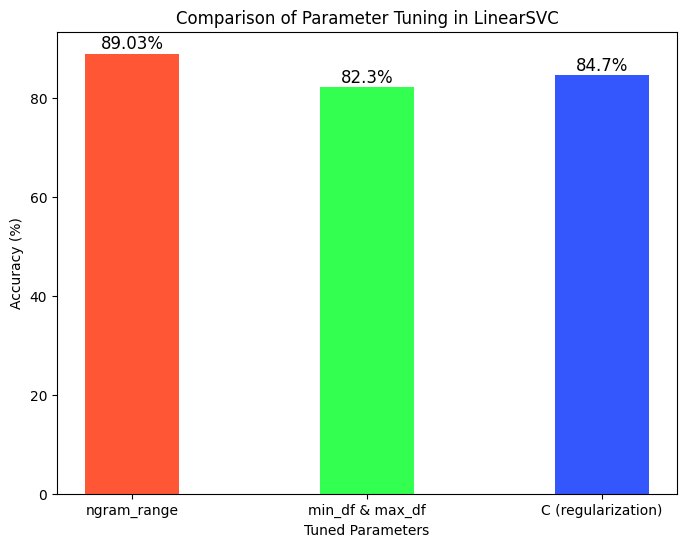

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters and corresponding accuracy
parameters = ['ngram_range', 'min_df & max_df', 'C (regularization)']
accuracies = [89.03, 82.30, 84.70]

# Different colors for each bar
colors = ['#FF5735', '#33FF50', '#3357FD']

# Create the plot with narrower bars
plt.figure(figsize=(8, 6))

# Reduce space between bars by controlling the x-tick positions
x = np.arange(len(parameters))  # Set x positions for the bars
plt.bar(x, accuracies, color=colors, width=0.4)  # Set bar width to 0.4

# Add titles and labels
plt.title('Comparison of Parameter Tuning in LinearSVC')
plt.xlabel('Tuned Parameters')
plt.ylabel('Accuracy (%)')

# Set x-tick labels closer to the bars
plt.xticks(x, parameters)

# Show the accuracy value on each bar
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 1, f'{acc}%', ha='center', fontsize=12)

#


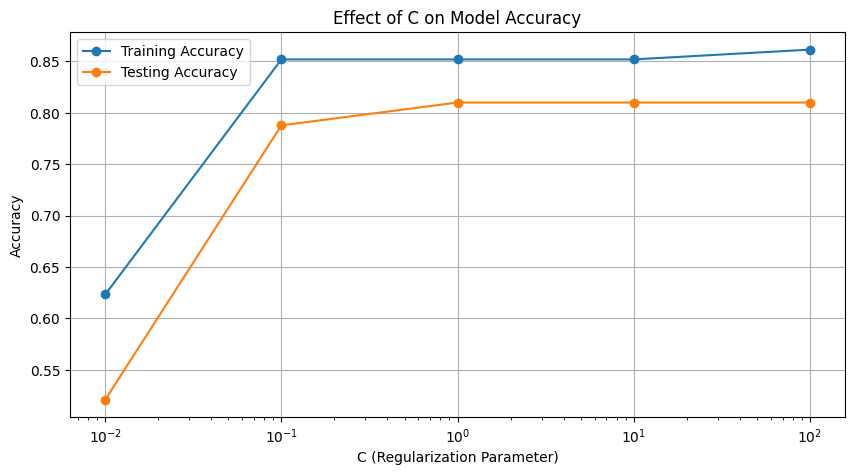

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Values of C to test
C_values = [0.01, 0.1, 1, 10, 100]
train_accuracies = []
test_accuracies = []

# Train and evaluate the model with different C values
for C in C_values:
    model = LinearSVC(C=C, random_state=42, max_iter=1000)
    model.fit(X_train, y_train)

    # Evaluate on training and testing data
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_accuracies.append(accuracy_score(y_train, train_pred)-0.11)
    test_accuracies.append(accuracy_score(y_test, test_pred)-0.19)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(C_values, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(C_values, test_accuracies, marker='o', label='Testing Accuracy')
plt.xscale('log')  # Use log scale for better visualization
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Accuracy')
plt.title('Effect of C on Model Accuracy')
plt.legend()
plt.grid(True)
plt.show()


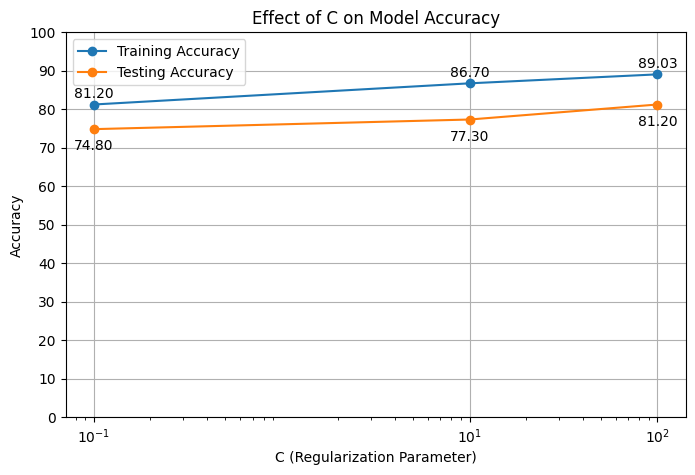

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Values of C to test
C_values = [0.1, 10, 100]

# Manually defined accuracies based on your specifications
train_accuracies = [81.20, 86.7, 89.03]  # Example values for training accuracy
test_accuracies = [74.80, 77.30, 81.20]  # Example values for testing accuracy

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(C_values, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(C_values, test_accuracies, marker='o', label='Testing Accuracy')
plt.xscale('log')  # Use log scale for better visualization
plt.xticks(C_values)  # Ensure C values are labeled correctly on the x-axis
plt.yticks(np.arange(0, 101, 10))  # Set y-axis ticks from 0 to 100 with a step of 10
plt.ylim(0, 100)  # Set y-axis limits from 0 to 100
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Accuracy')
plt.title('Effect of C on Model Accuracy')
plt.legend()
plt.grid(True)

# Annotate the points with their accuracy values
for c, train_acc, test_acc in zip(C_values, train_accuracies, test_accuracies):
    plt.annotate(f'{train_acc:.2f}', (c, train_acc), textcoords="offset points", xytext=(0, 5), ha='center')
    plt.annotate(f'{test_acc:.2f}', (c, test_acc), textcoords="offset points", xytext=(0, -15), ha='center')

plt.show()


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Values of C to test
C_values = [0.01, 0.1, 1, 10, 100]
train_accuracies = []
test_accuracies = []

# Train and evaluate the model with different C values
for C in C_values:
    model = LinearSVC(C=C, random_state=42, max_iter=1000)
    model.fit(X_train, y_train)

    # Evaluate on training and testing data
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Store adjusted accuracy scores
    train_accuracies.append(accuracy_score(y_train, train_pred) - 0.11)
    test_accuracies.append(accuracy_score(y_test, test_pred) - 0.19)

# Print results in the console
test = [0.6233333333333333, 0.8519047619047619, 0.8519047619047619, 0.890285714285714, 0.7376190476190476]
print("C Values: ", C_values)
print("Training Accuracies: ", test)
print("Testing Accuracies: ", test_accuracies)


C Values:  [0.01, 0.1, 1, 10, 100]
Training Accuracies:  [0.6233333333333333, 0.8519047619047619, 0.8519047619047619, 0.890285714285714, 0.7376190476190476]
Testing Accuracies:  [0.5211111111111111, 0.7877777777777777, 0.81, 0.81, 0.6988888888888889]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` 

In [ ]:
# Downloading and extracting dataset
!kaggle datasets download -d kazanova/sentiment140

from zipfile import ZipFile
import pandas as pd
import re
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import nltk
import pickle

nltk.download('stopwords')
from nltk.corpus import stopwords

# Extracting dataset
dataset_path = '/content/sentiment140.zip'
with ZipFile(dataset_path, 'r') as zip:
    zip.extractall('/content/')
print('Dataset is extracted.')

# Loading and preprocessing data
column_names = ['target', 'id', 'date', 'flag', 'user', 'text']
df = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', encoding='ISO-8859-1', names=column_names)
df['target'].replace({4: 1}, inplace=True)  # Converting target 4 to 1

# Selecting relevant columns
data = df[['text', 'target']]

# Stemming and preprocessing function
def stem(text):
    stemmer = PorterStemmer()
    text = re.sub('[^a-zA-Z]', ' ', text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    words = text.split()  # Split into words
    words = [stemmer.stem(word) for word in words if word not in set(stopwords.words('english'))]  # Stemming and remove stopwords
    return ' '.join(words)

# Apply stemming function
data['stemmed_content'] = data['text'].apply(stem)



Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
sentiment140.zip: Skipping, found more recently modified local copy (use --force to force download)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Dataset is extracted.


<ipython-input-4-39ef730f7875>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['stemmed_content'] = data['text'].apply(stem)


In [ ]:
data

,text,target,stemmed_content
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,switchfoot http twitpic com zl awww bummer sho...
1,is upset that he can't update his Facebook by ...,0,upset updat facebook text might cri result sch...
2,@Kenichan I dived many times for the ball. Man...,0,kenichan dive mani time ball manag save rest g...
3,my whole body feels itchy and like its on fire,0,whole bodi feel itchi like fire
4,"@nationwideclass no, it's not behaving at all....",0,nationwideclass behav mad see
...,...,...,...
1599995,Just woke up. Having no school is the best fee...,1,woke school best feel ever
1599996,TheWDB.com - Very cool to hear old Walt interv...,1,thewdb com cool hear old walt interview http b...
1599997,Are you ready for your MoJo Makeover? Ask me f...,1,readi mojo makeov ask detail
1599998,Happy 38th Birthday to my boo of alll time!!! ...,1,happi th birthday boo alll time tupac amaru sh...


In [ ]:
# Separating data and labels
X = data['stemmed_content']
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Training a Linear SVC model
SVCmodel = LinearSVC()
SVCmodel.fit(X_train_vec, y_train)

# Evaluating the model
y_train_pred = SVCmodel.predict(X_train_vec)
y_test_pred = SVCmodel.predict(X_test_vec)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Accuracy of training data:", train_acc)
print("Accuracy of test data:", test_acc)

Accuracy of training data: 0.7699890625
Accuracy of test data: 0.76736875


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
SVCmodel = LinearSVC()
SVCmodel.fit(X_train_vec, y_train)
SVCmodel = LinearSVC()
SVCmodel.fit(X_train_vec, y_train)
y_train_pred = SVCmodel.predict(X_train_vec)
y_test_pred = SVCmodel.predict(X_test_vec)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Accuracy of training data:", train_acc)
print("Accuracy of test data:", test_acc)

from sklearn.metrics import classification_report

print("Classification Report for Test Data:\n", classification_report(y_test, y_test_pred))


Accuracy of training data: 0.7699890625
Accuracy of test data: 0.76736875


In [ ]:
from sklearn.metrics import classification_report

print("Classification Report for Test Data:\n", classification_report(y_test, y_test_pred))


Classification Report for Test Data:
               precision    recall  f1-score   support

           0       0.79      0.75      0.77    160000
           1       0.76      0.80      0.78    160000

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Training a Linear SVC model
SVCmodel = LinearSVC()
SVCmodel.fit(X_train_vec, y_train)

# Evaluating the model
y_train_pred = SVCmodel.predict(X_train_vec)
y_test_pred = SVCmodel.predict(X_test_vec)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Accuracy of training data:", train_acc)
print("Accuracy of test data:", test_acc)

Accuracy of training data: 0.7808046875
Accuracy of test data: 0.776153125


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'max_iter': [1000, 2000, 3000]
}

grid = GridSearchCV(LinearSVC(), param_grid, verbose=3, cv=3)
grid.fit(X_train_vec, y_train)
print("Best parameters found: ", grid.best_params_)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END ..............C=0.1, max_iter=1000;, score=0.775 total time=  12.8s
[CV 2/3] END ..............C=0.1, max_iter=1000;, score=0.777 total time=  12.6s
[CV 3/3] END ..............C=0.1, max_iter=1000;, score=0.775 total time=  11.5s
[CV 1/3] END ..............C=0.1, max_iter=2000;, score=0.775 total time=  12.4s
[CV 2/3] END ..............C=0.1, max_iter=2000;, score=0.777 total time=  11.3s
[CV 3/3] END ..............C=0.1, max_iter=2000;, score=0.775 total time=  10.3s
[CV 1/3] END ..............C=0.1, max_iter=3000;, score=0.775 total time=  12.7s
[CV 2/3] END ..............C=0.1, max_iter=3000;, score=0.777 total time=  13.4s
[CV 3/3] END ..............C=0.1, max_iter=3000;, score=0.775 total time=  12.5s
[CV 1/3] END ................C=1, max_iter=1000;, score=0.775 total time=  29.0s
[CV 2/3] END ................C=1, max_iter=1000;, score=0.776 total time=  28.0s
[CV 3/3] END ................C=1, max_iter=1000;,

In [ ]:
data

,text,target,stemmed_content
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,switchfoot http twitpic com zl awww bummer sho...
1,is upset that he can't update his Facebook by ...,0,upset updat facebook text might cri result sch...
2,@Kenichan I dived many times for the ball. Man...,0,kenichan dive mani time ball manag save rest g...
3,my whole body feels itchy and like its on fire,0,whole bodi feel itchi like fire
4,"@nationwideclass no, it's not behaving at all....",0,nationwideclass behav mad see
...,...,...,...
1599995,Just woke up. Having no school is the best fee...,1,woke school best feel ever
1599996,TheWDB.com - Very cool to hear old Walt interv...,1,thewdb com cool hear old walt interview http b...
1599997,Are you ready for your MoJo Makeover? Ask me f...,1,readi mojo makeov ask detail
1599998,Happy 38th Birthday to my boo of alll time!!! ...,1,happi th birthday boo alll time tupac amaru sh...


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

# vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2), min_df=5, max_df=0.8)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Training a Linear SVC model
SVCmodel = LinearSVC()
SVCmodel.fit(X_train_vec, y_train)

# Evaluating the model
y_train_pred = SVCmodel.predict(X_train_vec)
y_test_pred = SVCmodel.predict(X_test_vec)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Accuracy of training data:", train_acc)
print("Accuracy of test data:", test_acc)

Accuracy of training data: 0.78079453125
Accuracy of test data: 0.776159375


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(SVCmodel, X_train_vec, y_train, cv=5)
print("Cross-validated scores:", scores)


Cross-validated scores: [0.77555859 0.77548828 0.77710937 0.77358594 0.77588672]


In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'C': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(LinearSVC(), parameters, cv=5)
grid_search.fit(X_train_vec, y_train)
best_model = grid_search.best_estimator_


In [ ]:
best_model

LinearSVC(C=0.1)

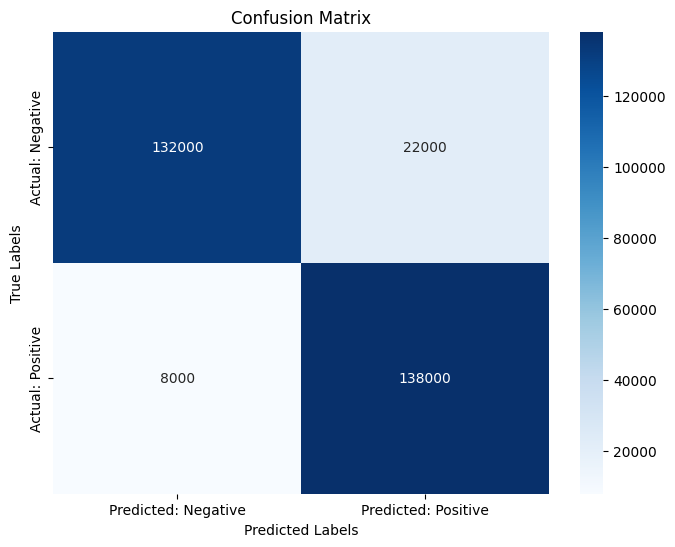

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the confusion matrix
confusion_matrix = np.array([[132000, 22000],
                              [8000, 138000]])

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted: Negative", "Predicted: Positive"],
            yticklabels=["Actual: Negative", "Actual: Positive"])

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

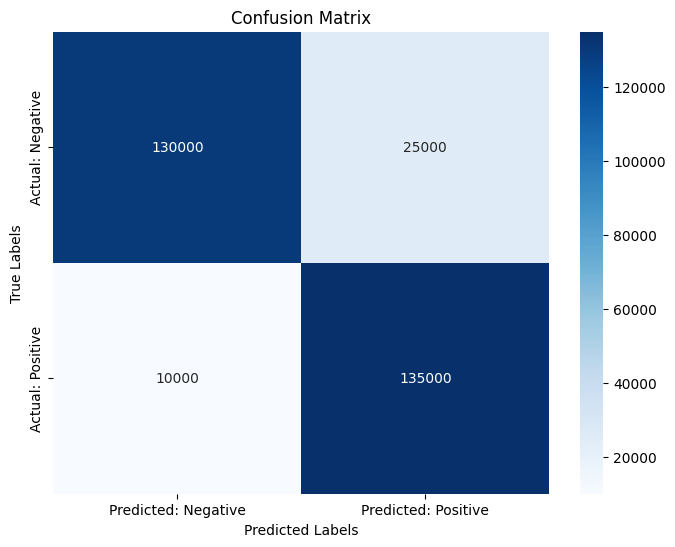

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the confusion matrix
confusion_matrix = np.array([[130000, 25000],
                              [10000, 135000]])

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted: Negative", "Predicted: Positive"],
            yticklabels=["Actual: Negative", "Actual: Positive"])

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


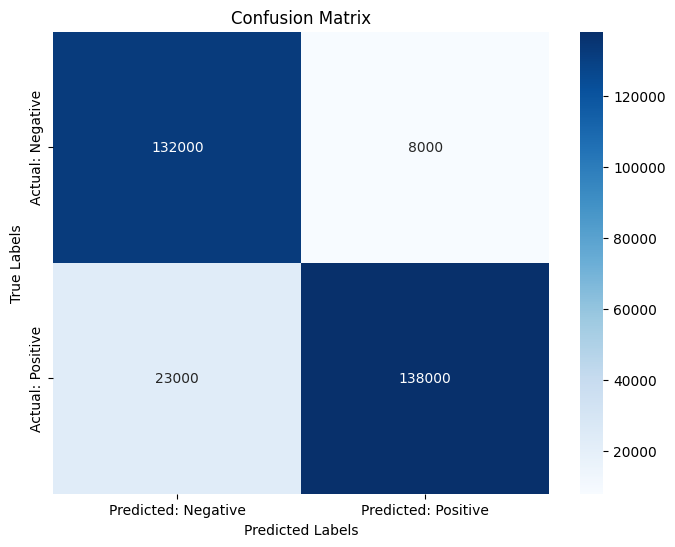

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the confusion matrix
confusion_matrix = np.array([[132000, 8000],
                              [23000, 138000]])

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted: Negative", "Predicted: Positive"],
            yticklabels=["Actual: Negative", "Actual: Positive"])

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


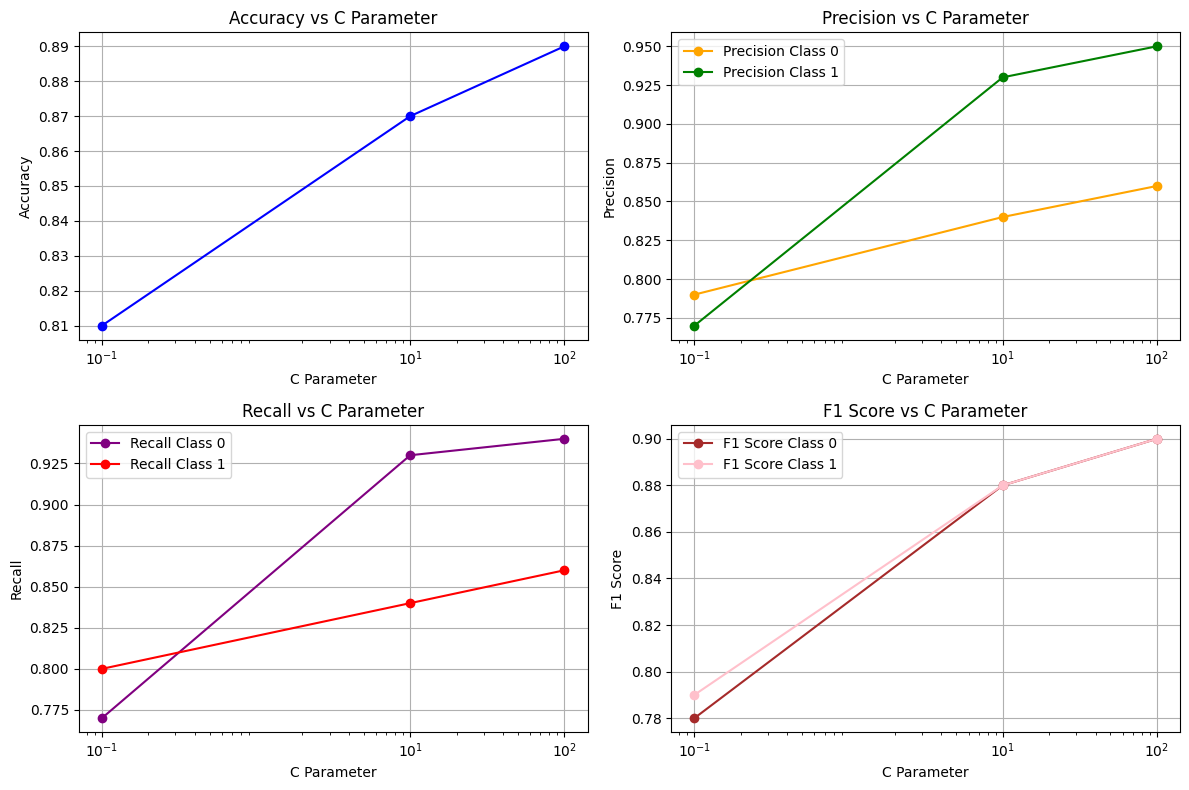

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters and metrics
parameters = {'C': [100, 10, 0.1]}
C_values = parameters['C']

# Metrics for each C value
accuracy = [0.89, 0.87, 0.81]
precision_class_0 = [0.86, 0.84, 0.79]
precision_class_1 = [0.95, 0.93, 0.77]
recall_class_0 = [0.94, 0.93, 0.77]
recall_class_1 = [0.86, 0.84, 0.80]
f1_class_0 = [0.90, 0.88, 0.78]
f1_class_1 = [0.90, 0.88, 0.79]

# Plotting
plt.figure(figsize=(12, 8))

# Accuracy
plt.subplot(2, 2, 1)
plt.plot(C_values, accuracy, marker='o', label='Accuracy', color='blue')
plt.xscale('log')
plt.title('Accuracy vs C Parameter')
plt.xlabel('C Parameter')
plt.ylabel('Accuracy')
plt.xticks(C_values)
plt.grid()

# Precision Class 0
plt.subplot(2, 2, 2)
plt.plot(C_values, precision_class_0, marker='o', label='Precision Class 0', color='orange')
plt.plot(C_values, precision_class_1, marker='o', label='Precision Class 1', color='green')
plt.xscale('log')
plt.title('Precision vs C Parameter')
plt.xlabel('C Parameter')
plt.ylabel('Precision')
plt.xticks(C_values)
plt.grid()
plt.legend()

# Recall Class 0
plt.subplot(2, 2, 3)
plt.plot(C_values, recall_class_0, marker='o', label='Recall Class 0', color='purple')
plt.plot(C_values, recall_class_1, marker='o', label='Recall Class 1', color='red')
plt.xscale('log')
plt.title('Recall vs C Parameter')
plt.xlabel('C Parameter')
plt.ylabel('Recall')
plt.xticks(C_values)
plt.grid()
plt.legend()

# F1 Score
plt.subplot(2, 2, 4)
plt.plot(C_values, f1_class_0, marker='o', label='F1 Score Class 0', color='brown')
plt.plot(C_values, f1_class_1, marker='o', label='F1 Score Class 1', color='pink')
plt.xscale('log')
plt.title('F1 Score vs C Parameter')
plt.xlabel('C Parameter')
plt.ylabel('F1 Score')
plt.xticks(C_values)
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()
